### Negative Changes
Find max negative change in 2 consecutive seconds for both consumption and PV

In [1]:
rm(list = ls())
require(R.matlab)

load("../../Data/Generated Data/1 - Secondly/cons_seg.Rdata") # secondly gen  data for days analyzed in 1st script (gen.all)
load("../../Data/Generated Data/1 - Secondly/gen_seg.Rdata")  # secondly cons data for days analyzed in 1st script (cons.all)

# load(file = "Fitxers_resultats/Models_previsions.RData")

Loading required package: R.matlab
R.matlab v3.6.1 (2016-10-19) successfully loaded. See ?R.matlab for help.

Attaching package: 'R.matlab'

The following objects are masked from 'package:base':

    getOption, isOpen



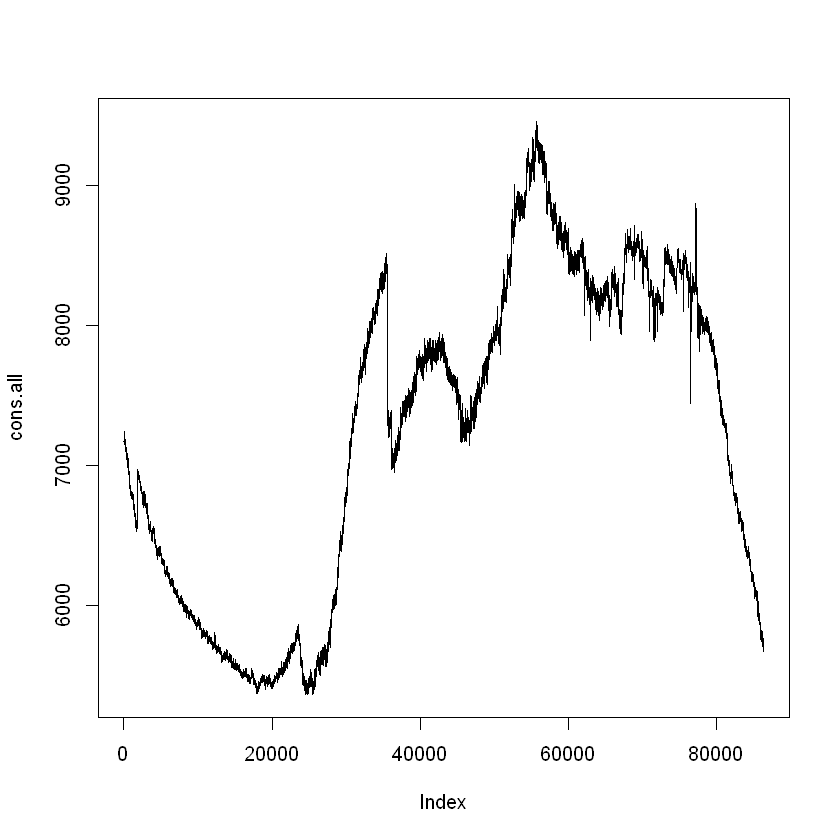

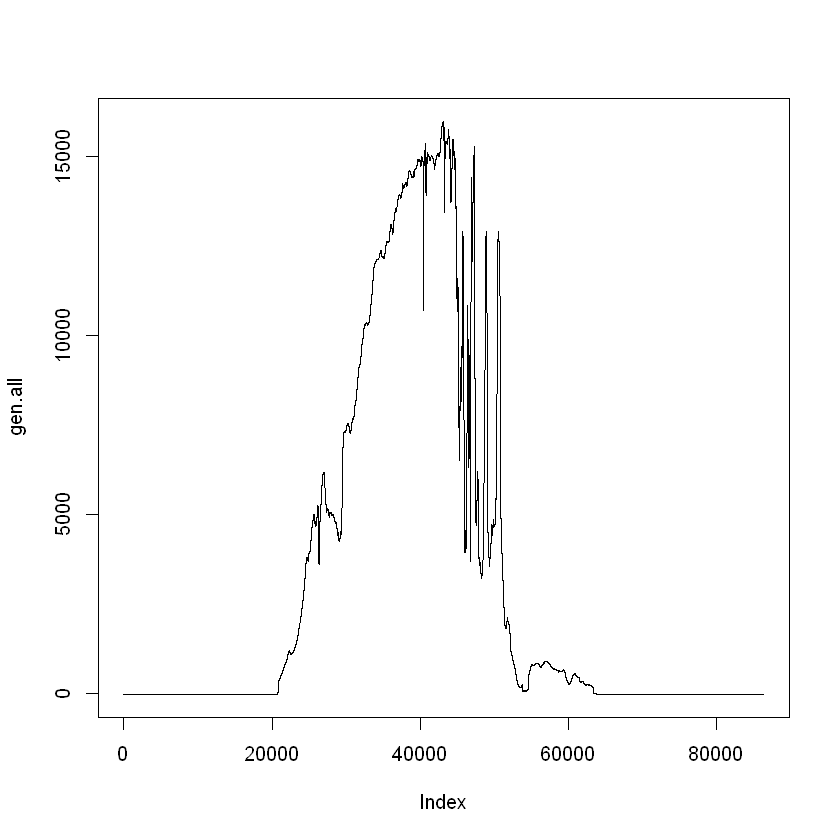

In [2]:
plot(cons.all,type='l')
plot(gen.all,type='l')

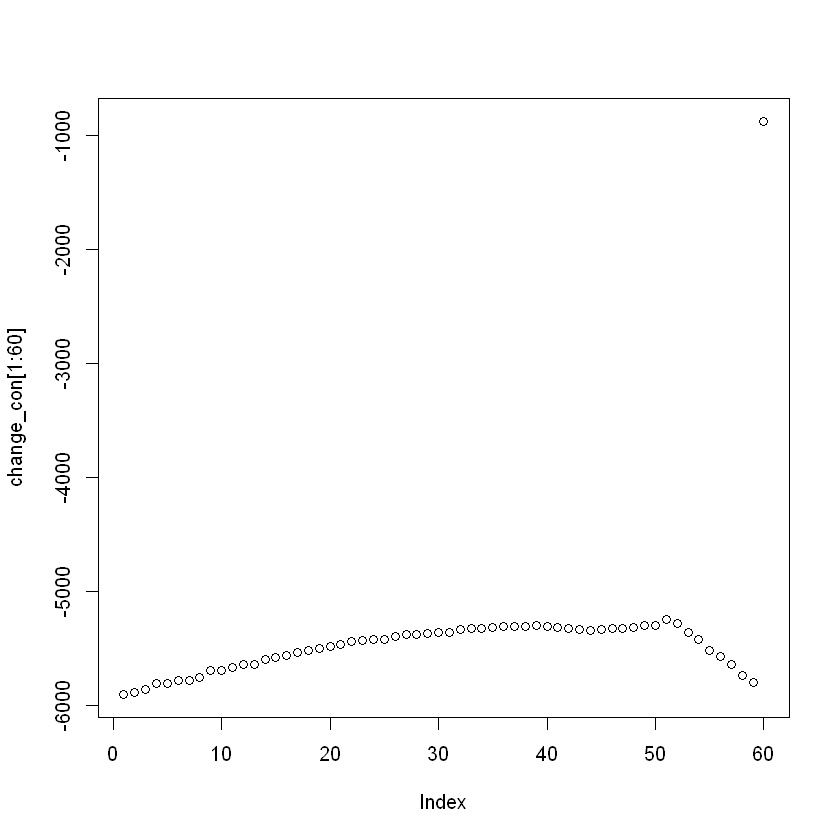

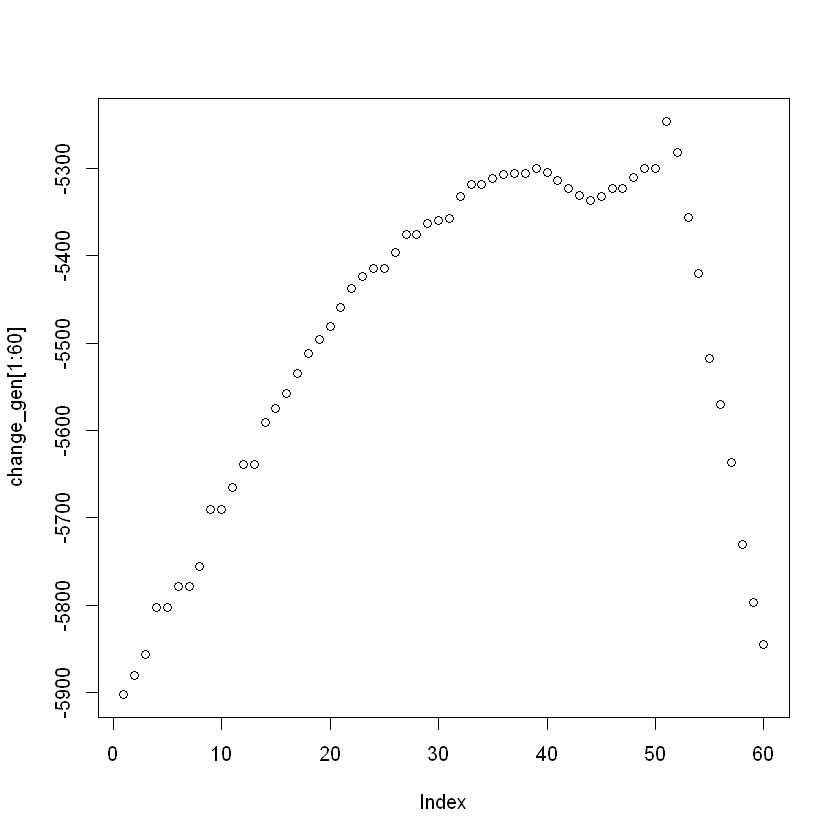

In [3]:
# Calculation of the worst case allowing maximum solar consumption
change_con = 0
change_gen = 0

# Find the biggest negative change within 1min (60s)
for (i in 1:60)
{
  change_con = c(change_gen,min(diff(cons.all, lag = i)[-1], na.rm=TRUE))
  change_gen = c(change_gen,min(diff(gen.all, lag = i)[-1], na.rm=TRUE))
}
change_con = change_con[-1]
change_gen = change_gen[-1]

plot(change_con[1:60])
plot(change_gen[1:60])

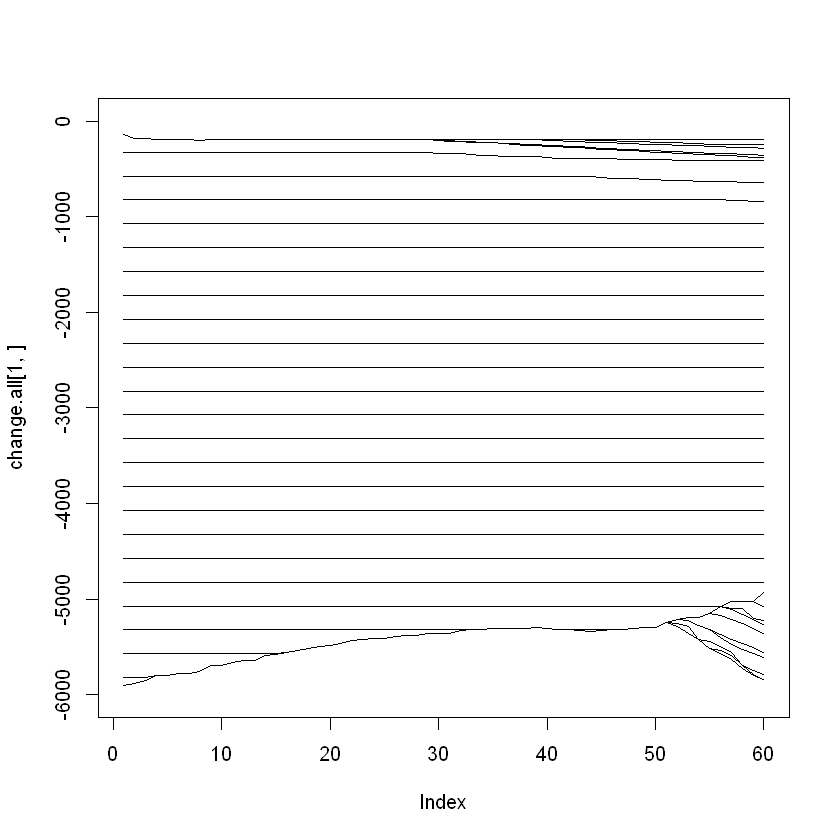

In [4]:
# -------------------------------------------------------------------------- #
# If we are curtailing PV gen - what's the max change within 1 min scope ??? #
# -------------------------------------------------------------------------- #

# Model Relation between fall and maximum power
n = 60
k = 0
from.pv = 20000
to.pv = 500
by.pv = -250

# pv_curtail - power change limitation due to grid operation codes!!!

change.all <- matrix(0,length(seq(from = from.pv, to = to.pv, by =by.pv))*n,ncol = n, nrow = length(seq(from = from.pv, to = to.pv, by =by.pv)))
for (pv_curtail in seq(from = from.pv, to = to.pv, by =by.pv)){
  
  k = k+1
  # pmin - limits the gen.all vector with pv_curtail value
  gen.all.curt = pmin(gen.all,pv_curtail) 
  
  change_gen.curt = 0
  # Find the max neg. difference withing 1 min
  for (i in 1:60)
  {
    change_gen.curt = c(change_gen.curt,min(diff(gen.all.curt, lag = i)[-1]))
  }
  change_gen.curt = change_gen.curt[-1]
  
  # track the max change within first n=25 seconds
  change.all[k,] <- change_gen.curt[1:n]
} 

plot(change.all[1,],ylim = c(-6000,0),type = "l", col = 1) # ylim = c(-3100,0)
for (i in 2:length(seq(from = from.pv, to = to.pv, by =by.pv))){
  lines(change.all[i,])
}

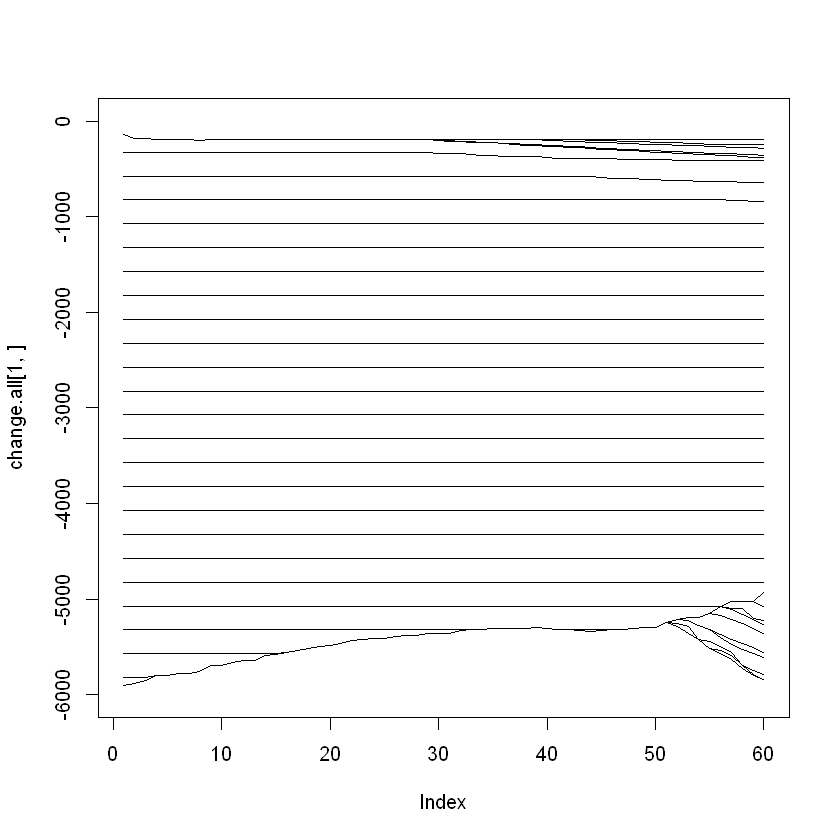

In [5]:
plot(change.all[1,],ylim = c(-6000,0),type = "l", col = 1) # ylim = c(-3100,0)
for (i in 2:length(seq(from = from.pv, to = to.pv, by =by.pv))){
  lines(change.all[i,])
}

In [6]:
writeMat( change_gen_all_neg = change.all,change_con_neg = change_con[1:n],pv_curtail = seq(from = from.pv, to = to.pv, by =by.pv) ,con = '../../Data/Generated Data/3 - Changes/M_change_neg.mat')